In [13]:
import json
import os
import numpy as np
import itertools

from transformers import PreTrainedTokenizerFast, AutoTokenizer, AutoConfig
from transformers import XLMRobertaTokenizerFast
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
from notebook_utils import *

# Load the in-lang language modeling results (MRR)

In [15]:
result_dir = "/home/limisiewicz/my-luster/entangled-in-scripts/models"

languages = ('ar', 'tr', 'zh','el', 'es', 'en')
#languages = ('ar', 'tr','el', 'es', 'en')
alphas = (0.25, 0.5, 0.75, 1.0)

In [16]:
languages = ('ar', 'tr', 'zh','el', 'es', 'en')

mrr_results = {}
metric='mrr'

for lang in languages:
    mrr_results[lang] = []
    for alpha in alphas:

        result_file = f"{result_dir}/LM/multilingual-tokenization/alpha-{alpha}_alpha-train-0.25_N-120000_1234/{lang}/{metric}_eval_all.txt"
            
        with open(result_file, 'r') as in_file:
            res = json.load(in_file)[f'eval_{metric}']
                
        mrr_results[lang].append(res)

In [17]:
languages = ('ar', 'tr', 'zh','el', 'es', 'en')
#alphas = (0.25, 0.5, 0.75, 1.0)
alphas = (0.25, 1.0)

baselines = ('multilingual','nooverlap', 'merged')

mrr_results_baselines = {}
metric='mrr'


for lang in languages:
    mrr_results_baselines[lang] = {}
    for baseline in ('nooverlap', 'merged'):
        if baseline == 'nooverlap':
            result_file = f"{result_dir}/LM/{baseline}-tokenization/alpha-{alpha}_alpha-train-0.25_N-20000_1234/{lang}/{metric}_eval_all.txt"
        else:
            alpha = 1.0
            result_file = f"{result_dir}/LM/{baseline}-tokenization/alpha-{alpha}_alpha-train-0.25_N-120000_1234/{lang}/{metric}_eval_all.txt"

        with open(result_file, 'r') as in_file:
            res = json.load(in_file)[f'eval_{metric}']
                
        mrr_results_baselines[lang][baseline] = res

In [18]:
languages = ('ar', 'tr', 'zh','el', 'es', 'en')
#alphas = (0.25, 0.5, 0.75, 1.0)
alphas = (0.25, 1.0)

baselines = ('multilingual','nooverlap', 'merged', 'xlmr')

mrr_results_baselines = {}
metric='mrr'

for lang in languages:
    mrr_results_baselines[lang] = {}
    for baseline in baselines:

        mrr_results_baselines[lang][baseline] = []
        for alpha in alphas:
            if baseline == 'nooverlap':
                result_file = f"{result_dir}/LM/{baseline}-tokenization/alpha-{alpha}_alpha-train-0.25_N-20000_1234/{lang}/{metric}_eval_all.txt"
            elif baseline == 'xlmr':
                result_file = f"{result_dir}/LM/{baseline}-tokenization/alpha-0.25_alpha-train-0.25_N-250002_1234/{lang}/{metric}_eval_{metric}_eval_all.txt"
            else:
                result_file = f"{result_dir}/LM/{baseline}-tokenization/alpha-{alpha}_alpha-train-0.25_N-120000_1234/{lang}/{metric}_eval_all.txt"

            with open(result_file, 'r') as in_file:
                res = json.load(in_file)[f'eval_{metric}']

            mrr_results_baselines[lang][baseline].append(res)

In [19]:
mrr_results_baselines

{'ar': {'multilingual': [0.3602953026768366, 0.4815286580941106],
  'nooverlap': [0.3811447791722932, 0.3835480240598098],
  'merged': [0.31503655720805185, 0.34449324656432545],
  'xlmr': [0.43123875243637155, 0.43123875243637155]},
 'tr': {'multilingual': [0.3590835325725853, 0.43158250562777617],
  'nooverlap': [0.39609075894040113, 0.39350575168315577],
  'merged': [0.3055931433421304, 0.32219452732193543],
  'xlmr': [0.40619852933588035, 0.40619852933588035]},
 'zh': {'multilingual': [0.3417888876056581, 0.36627926672043254],
  'nooverlap': [0.41430004230241463, 0.4803467445853164],
  'merged': [0.382171013061082, 0.4008058806985225],
  'xlmr': [0.4608703239808458, 0.4608703239808458]},
 'el': {'multilingual': [0.4634966868140913, 0.5456548551143326],
  'nooverlap': [0.4284566673548969, 0.42201779190291877],
  'merged': [0.412005163593364, 0.44632710685394084],
  'xlmr': [0.4953894896085464, 0.4953894896085464]},
 'es': {'multilingual': [0.4963255851508827, 0.559062114007662],
  '

## Plot in-lang results

In [20]:
def plot_baslines(axes, lang_baseline_data, ylabel):
    alphas = (0.25,  1.0)
    languages = ('ar', 'tr', 'zh','el', 'es', 'en')
    baselines = ('multilingual','nooverlap', 'merged', 'xlmr')
    colors= ["C1", "C2", "C3", "C4", "C5", "C6"]
    markers=['', 'o', 'v', 'X']
    styles=['-', ':', '-.', '']

    for bl_idx, baseline in enumerate(baselines): 
        for lang_idx, lang in enumerate(languages):
            axes.plot(alphas, lang_baseline_data[lang][baseline], color=colors[lang_idx],
                      marker=markers[bl_idx], ls=styles[bl_idx], alpha=0.6)


    dummy_lines = []
    for m_idx in range(len(markers)):
        dummy_lines.append(axes.plot([],[], c="black", ls=styles[m_idx], marker = markers[m_idx], alpha=0.6)[0])
    lines = axes.get_lines()
    legend1 = axes.legend([lines[i] for i in range(len(colors))], languages, loc='upper center', ncol=6)
    legend2 = axes.legend([dummy_lines[i] for i in range(len(markers))], baselines, loc='lower center', ncol=6)
    axes.add_artist(legend1)
    axes.set_xlabel("Alpha")
    axes.set_ylabel(ylabel)

In [21]:
mrr_results[lang]

[0.49516206851140926,
 0.4924906079326451,
 0.4901269034313298,
 0.476372813583328]

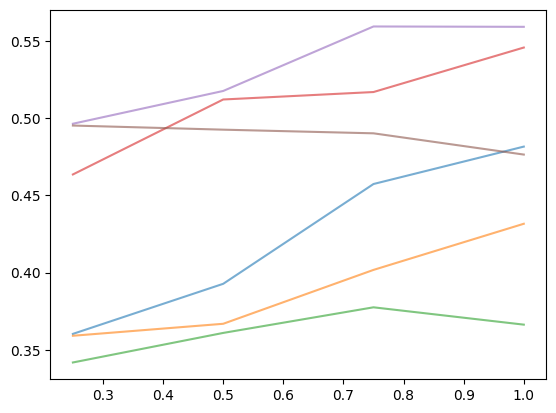

In [22]:
fig, axes = plt.subplots()
alphas = (0.25, 0.5, 0.75, 1.0)

for lang_idx, lang in enumerate(languages):
    axes.plot(alphas, mrr_results[lang], alpha=0.6)

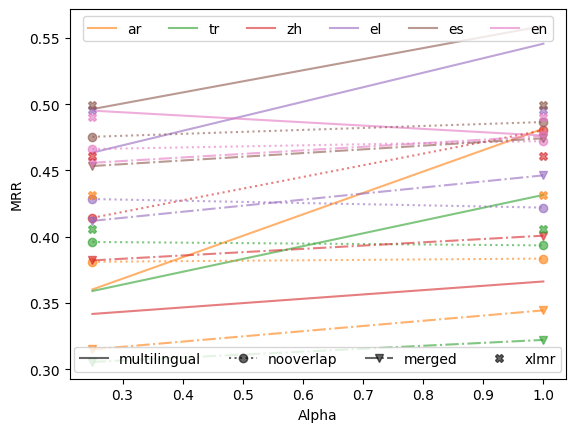

In [23]:
fig, axes = plt.subplots()

plot_baslines(axes,mrr_results_baselines, "MRR")